# 회귀분석 과제
2022-01-20
- 출처 18기 DS 신혜연님

---

제출 형식: 본인 Github에 다음과 같은 파일명으로 두 개의 파일을 업로드하시면 됩니다.  
- 20기_학과명_이름.ipynb  
- graduate_submission.csv

# 구글 드라이브 mount **(Colab을 사용하는 경우에만 해당)**
Jupyter Notebook을 사용하시는 경우 이 부분은 무시하고 진행하시면 됩니다.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# 목표: 대학원 합격 확률 및 합격 여부 예측

- 회귀: 학습 데이터로 선형 회귀, Ridge, Lasso를 통해 학습시켜 봅시다.

완성된 모델로 테스트 데이터의 **합격 여부**를 예측해보세요. (합격 여부를 예측하는 것은 분류 문제입니다.)  
아래의 빈칸(코드+서술 답안)을 모두 채워 넣어주시면 됩니다.  
"## TODO"라고 적힌 부분에는 코드를 작성하여 주시고, "A."라고 적힌 부분에는 서술 답안을 작성하여 주세요.  
이를 모두 완성한 **(1) ipynb 파일**과 최종 예측을  **(2) csv 파일**로 저장하여 본인 Github에 업로드하시면 됩니다.

In [1]:
# 패키지 불러오기
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 경고 무시
import warnings
warnings.filterwarnings(action='ignore')

# 데이터 로드 및 확인
graduate_train.csv 파일과 graduate_test.csv 파일을 My Drive에 넣어주세요.  
(Jupyter Notebook을 사용하시는 경우에는 graduate_train.csv 파일과 graduate_test.csv 파일 경로를 각각의 로컬 디렉토리 위치로 변경해주세요.)

In [68]:
# train 데이터 불러오기
train_df = pd.read_csv('./graduate_train.csv')
# train 데이터 크기 확인
print(train_df.shape)
# train 데이터 훑어보기
train_df.head()

(400, 8)


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,310,105,2,3.0,3.5,8.01,No,0.71
1,307,105,2,2.5,4.5,8.12,Yes,0.67
2,329,111,4,4.5,4.0,9.01,Yes,0.81
3,300,105,1,1.0,2.0,7.80,No,0.58
4,329,114,5,4.0,5.0,9.30,Yes,0.86


In [69]:
# test 데이터 불러오기
test_df = pd.read_csv('./graduate_test.csv')

# test 데이터 크기 확인
print(test_df.shape)
# test 데이터 훑어보기
test_df.head()
# test 데이터에는 'Chance of Admit'이 없습니다. 이 확률을 예측해보는 것이 과제입니다.

(100, 7)


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,304,103,5,5.0,4.0,8.64,No
1,297,96,2,2.5,1.5,7.89,No
2,302,101,2,2.5,3.5,7.96,No
3,318,112,3,4.0,3.5,8.67,No
4,304,100,4,1.5,2.5,7.84,No


# 1. 결측치

데이터에 결측치가 있는지 확인해보세요.

In [63]:
## TODO
train_df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Q. 데이터에 결측치가 있나요? 어떤 방법으로 처리하였나요?  
A. 결측치가 없는 것 같습니다!

# 2. 범주형 변수

설명변수 중 범주형 변수가 존재하나요?  
존재한다면 어떻게 처리해주어야 할까요?  
**학습 데이터를 수정하는 경우 테스트 데이터도 그에 맞게 수정해주어야 된다는 점에 유의하세요.**

In [70]:
## Research
train_df['Research'] = train_df['Research'].map({'Yes': 1, 'No': 0})
## Univ. Ratings
train_dummy = pd.get_dummies(train_df['University Rating'])
train_dummy.rename(columns={1:"univ_1", 2 : "univ_2", 3:"univ_3", 4:"univ_4",5:"univ_5"}, inplace=True)
train_df = pd.concat([train_df, train_dummy], axis=1)

train_df.drop(columns=['University Rating'], inplace=True)
print(train_df)

     GRE Score  TOEFL Score  SOP  LOR  CGPA  Research  Chance of Admit  \
0          310          105  3.0  3.5  8.01         0             0.71   
1          307          105  2.5  4.5  8.12         1             0.67   
2          329          111  4.5  4.0  9.01         1             0.81   
3          300          105  1.0  2.0  7.80         0             0.58   
4          329          114  4.0  5.0  9.30         1             0.86   
..         ...          ...  ...  ...   ...       ...              ...   
395        316          110  3.5  4.0  8.56         0             0.75   
396        302          110  4.0  4.5  8.50         0             0.65   
397        312          107  4.5  4.0  8.65         1             0.73   
398        298           99  1.5  3.0  7.46         0             0.53   
399        324          113  4.5  4.0  8.79         0             0.76   

     univ_1  univ_2  univ_3  univ_4  univ_5  
0         0       1       0       0       0  
1         0       1

In [71]:
## Research
test_df['Research'] = test_df['Research'].map({'Yes': 1, 'No': 0})
## Univ. Ratings
test_dummy = pd.get_dummies(test_df['University Rating'])
test_dummy.rename(columns={1:"univ_1", 2 : "univ_2", 3:"univ_3", 4:"univ_4",5:"univ_5"}, inplace=True)
test_df = pd.concat([test_df, test_dummy], axis=1)

test_df.drop(columns=['University Rating'], inplace=True)
print(test_df)

    GRE Score  TOEFL Score  SOP  LOR  CGPA  Research  univ_1  univ_2  univ_3  \
0         304          103  5.0  4.0  8.64         0       0       0       0   
1         297           96  2.5  1.5  7.89         0       0       1       0   
2         302          101  2.5  3.5  7.96         0       0       1       0   
3         318          112  4.0  3.5  8.67         0       0       0       1   
4         304          100  1.5  2.5  7.84         0       0       0       0   
..        ...          ...  ...  ...   ...       ...     ...     ...     ...   
95        312          107  3.0  2.0  7.90         1       0       0       1   
96        313           94  2.5  1.5  8.13         0       0       1       0   
97        313          109  4.0  3.5  9.00         0       0       0       1   
98        316          104  3.0  3.5  8.00         1       0       0       1   
99        327          113  4.5  4.5  9.11         1       0       0       0   

    univ_4  univ_5  
0        0       1

Q. 어떤 변수가 범주형인가요? 어떻게 처리해 주었나요? 
A. University Rating column이 범주형 데이터로 이루어져 있었습니다. 
pd.get_dummies 함수를 이용해서 각 카테고리 값별로 범주화해주었습니다.
Research column같은경우엔 map 함수를 이용하여 0, 1로 바꿔줬습니다

# 3. 선형(Linear) 회귀

In [72]:
# 먼저 데이터를 설명변수와 종속변수로 분리합니다.
X = train_df.drop('Chance of Admit', axis=1)
y = train_df['Chance of Admit']

In [73]:
# 데이터를 train과 test로 분리하여 사용합니다.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [74]:
# 각각의 크기 확인
print("training predictors size:", X_train.shape)
print("training response size:", y_train.shape)
print("test predictors size:", X_test.shape)
print("test response size:", y_test.shape)

training predictors size: (320, 11)
training response size: (320,)
test predictors size: (80, 11)
test response size: (80,)


In [75]:
X_train.head()

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,univ_1,univ_2,univ_3,univ_4,univ_5
33,338,120,5.0,5.0,9.66,1,0,0,0,1,0
253,328,116,5.0,5.0,9.50,1,0,0,0,0,1
118,332,118,4.5,3.5,9.36,1,0,1,0,0,0
300,323,108,3.5,3.0,8.60,0,0,0,1,0,0
115,338,117,3.5,4.5,9.46,1,0,0,0,1,0


### 3.1. scikit-learn으로 선형 회귀

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
# 1. 먼저 모델을 만들어 줍니다.
reg = LinearRegression()
## TODO

# 2. 모델을 적합시킵니다.
## TODO
reg.fit(X_train, y_train)

# 3. train 세트와 test 세트에서의 성능을 확인합니다. (이 경우 결정계수 R^2)
## TODO
print("Training R^2: %.2f" % reg.score(X_train, y_train))
print("Test R^2: %.2f" % reg.score(X_test, y_test))

Training R^2: 0.83
Test R^2: 0.77


#### 3.1.1. 모델의 MSE와 R^2를 구해봅시다.

In [78]:
from sklearn.metrics import mean_squared_error, r2_score

In [79]:
# 4. X_test로 y_pred를 만들어줍니다.
## TODO

y_pred = reg.predict(X_test)

print('MSE: %.4f' % mean_squared_error(y_test, y_pred))
print('Variance score: %.4f' % r2_score(y_test, y_pred))

MSE: 0.0041
Variance score: 0.7667


#### 3.1.2. 모델의 절편 계수를 확인해봅시다.

In [80]:
## TODO
print("intercept:", reg.intercept_)

intercept: -1.2468477331854375


Q. 절편 계수의 의미는 무엇인가요?  
A. 관측 데이터의 정확한 값을 위해서 필요한 값..? 데이터가 범주를 벗어날경우에는 좀 이상한 것 같기도 하고.. 그냥 수학적으로는 x=0일때 값이긴 한데 실제 상황에서 x=0인 경우가 없다면 크게 의미부여할거 없을것 같기도 하구요??? 잘 모르겠습니다..

#### 3.1.3. 모델의 기울기 계수를 확인해 보세요.

In [81]:
## TODO
beta = pd.DataFrame(reg.coef_, index=X.columns, columns=["slope"])
beta.sort_values("slope")

,slope
univ_2,-0.009994
univ_4,-0.008298
univ_3,0.000305
GRE Score,0.001584
TOEFL Score,0.003738
univ_1,0.006344
SOP,0.008319
univ_5,0.011643
LOR,0.016720
Research,0.026710


Q. 기울기 계수의 의미는 무엇인가요? 어떤 예측변인이 대학원 합격 확률과 유의미한 관계를 가지고 있으며 이것을 어떻게 해석할 수 있나요?  
A. 각 독립 변수들이 종속변수를 결정하는데에 있어서 어떤 영향을 미치는지를 보여줍니다. 기울기 계수의 절대값이 클수록 더 큰 영향을 미친다고 볼 수 있습니다. 위의 경우에서는 CGPA가 가장 큰 영향을 미치는 것으로 보입니다. 양의 계수이므로 CGPA가 높을수록 합격 확률이 커진다고 해석할 수 있습니다.

#### 3.1.4. 연속형 설명변수 중 하나를 골라 종속변수와의 관계를 scatter plot으로 그려 보세요.

<AxesSubplot:xlabel='CGPA', ylabel='Chance of Admit'>

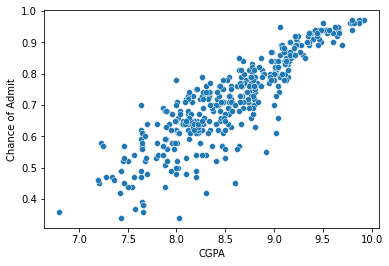

In [82]:
## TODO
sns.scatterplot(x = 'CGPA', y='Chance of Admit', data=train_df)

#### 3.1.5. 범주형 설명변수와 종속변수의 관계를 box plot으로 그려 보세요.

<AxesSubplot:xlabel='Research', ylabel='Chance of Admit'>

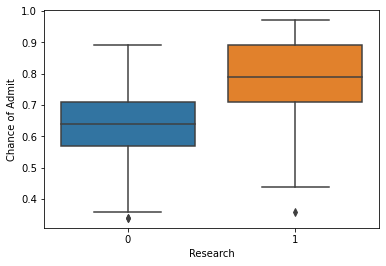

In [85]:
## TODO
sns.boxplot(x='Research', y='Chance of Admit', data=train_df)

### 3.2. StatsModels로 선형 회귀 시행하기

In [86]:
import statsmodels.api as sm

In [87]:
## TODO
model = sm.OLS(y_train, X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance of Admit   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     149.3
Date:                Thu, 27 Jan 2022   Prob (F-statistic):          6.03e-112
Time:                        22:42:12   Log-Likelihood:                 451.49
No. Observations:                 320   AIC:                            -881.0
Df Residuals:                     309   BIC:                            -839.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
GRE Score       0.0016      0.001      2.484      0.014       0.000       0.003
TOEFL Score     0.0037      0.001      3.272      0.001       0.001       0.006
SOP             0.0083      0.006      1.455      0.147      -0.003       0.020
LOR             0.0167      0.005      3.257      0.001       0.007       0.027
CGPA            0.1126      0.012      9.280      0.000       0.089       0.136
Research        0.0267      0.008      3.195      0.002       0.010       0.043
univ_1         -1.2405      0.135     -9.204      0.000      -1.506      -0.975
univ_2         -1.2568      0.135     -9.280      0.000      -1.523      -0.990
univ_3         -1.2465      0.136     -9.140      0.000      -1.515      -0.978
univ_4         -1.2551      0.139     -9.036      0.000      -1.528      -0.982
univ_5         -1.2352      0.141     -8.782      0.000      -1.512      -0.958
==============================================================================
Omnibus:                       67.371   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.759
Skew:                          -1.042   Prob(JB):                     1.11e-33
Kurtosis:                       5.653   Cond. No.                     3.05e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Q. R^2와 F-statistic을 고려해 볼 때, 이 모델은 좋은 모델이라고 볼 수 있나요?  
A. R^2값이 1에 가까우므로 좋은 모델이라고 볼 수 있습니다!

Q. 계수에 대한 가설 검정 결과를 바탕으로 'University Rating'이 대학원 합격률에 미치는 영향을 어떻게 해석할 수 있을까요?  
A. 흠.... 잘 모르겠습니다.. 일단 coef과 왜 사이킷런에서 했을때랑 다르게 나오는지 모르겠고, statsmodel 상에서 coef가 다 비슷하게 나와서 좀 혼란스럽네요!

# 4. Ridge, Lasso 회귀

이번에는 scikit-learn으로 Ridge와 Lasso를 시도해 보세요.  
**가장 적절한 수준의 alpha를 찾아 모델에 적용해 보세요.**  
(힌트: cross-validation을 사용하세요.)  
(참고자료:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html  
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html)

In [101]:
from sklearn.linear_model import RidgeCV

alphas = np.arange(0, 10, 0.01)

# 1. 먼저 모델을 만들어 줍니다.
ridge_model = RidgeCV(alphas=alphas, cv=2)

# 2. 모델을 적합시킵니다.
ridge_model.fit(X_train, y_train)

# 3. train 세트와 test 세트에서의 성능을 확인합니다. (이 경우 결정계수 R^2)
print("Training R^2: %.2f" % ridge_model.score(X_train, y_train))
print("Test R^2: %.2f" % ridge_model.score(X_test, y_test))

Training R^2: 0.83
Test R^2: 0.77


In [103]:
from sklearn.linear_model import LassoCV

alphas = np.arange(0, 10, 0.01)

# 1. 먼저 모델을 만들어 줍니다.
lasso_model = LassoCV(alphas=alphas, cv=2)

# 2. 모델을 적합시킵니다.
lasso_model.fit(X_train, y_train)

# 3. train 세트와 test 세트에서의 성능을 확인합니다. (이 경우 결정계수 R^2)
print("Training R^2: %.2f" % lasso_model.score(X_train, y_train))
print("Testing R^2: %.2f" % lasso_model.score(X_test, y_test))

Training R^2: 0.83
Testing R^2: 0.77


왜 다 값이 똑같죠...? 머가잘못된거지...

In [108]:
graduate_pred = lasso_model.predict(test_df)
graduate_pred
pred_df = pd.DataFrame(data=graduate_pred, columns=['Chance of Admit'])

In [111]:
result = pd.concat([test_df, pred_df], axis=1)
result.to_csv('./graduate_submission.csv')